# Problem & Task
Automating loan application predictions
<br><br><br><br>

<br><br><br><br><br><br><br><br>

<br><br><br><br><br><br><br><br>

# Approach
* Data exploration
* Filling missing values
* Data transformation & feature engineering
* Modelling
* Deployment 
<br><br><br><br>
# Hypotheses:
* Effects of numerical features:
    * Longer amount term
    * Higher income
    * Lower loan amount
* Effects of categorical features
    * Self employment
    * Credit history available
    * Higher education level 
<br><br><br><br><br><br><br><br><br><br><br><br>

<br><br><br><br><br><br><br><br>

In [ ]:
# Loan status distribution by gender and property_area
plot_proportion(df, columns=['Gender','Property_Area',], 
    classication='Loan_Status', label='N', barmode='stack')

<br><br><br><br><br><br><br><br>

In [ ]:
# Loan status distribution by married, and dependents
plot_proportion(df, columns=['Married','Dependents'], 
    classication='Loan_Status', label='N', barmode='stack')

<br><br><br><br><br><br><br><br>

In [ ]:
# Loan status distribution by education and self_employed
plot_proportion(df, columns=['Education', 'Self_Employed'], 
    classication='Loan_Status', label='N', barmode='stack')

<br><br><br><br><br><br><br><br>

In [ ]:
# Loan status distribution by credit_history
plot_proportion(df, columns=['Credit_History'], 
    classication='Loan_Status', label='N', barmode='stack')

<br><br><br><br><br><br><br><br>

In [ ]:
# Distributions of 'LoanAmount','Loan_Amount_Term' showing loan status
plot_int_hist(df, ['LoanAmount','Loan_Amount_Term'], 'Loan_Status', label='N')

<br><br><br><br><br><br><br><br>

In [ ]:
# Applicant income 
hist_box(df, column='ApplicantIncome', color='Loan_Status')

In [ ]:
# Coapplicant income 
hist_box(df, column='CoapplicantIncome', color='Loan_Status')

# Feature Engineering

In [ ]:
# Total income 
hist_box(df, column='Total_Income', color='Loan_Status')

# Data transformation

In [ ]:
# Raw vs. log transformed
plot_int_hist(df,raw_vs_transformed_columns)

## Which Features Correlate with Each Other?

,LoanAmount,Total_Income,Loan_Amount_Term,ApplicantIncome,CoapplicantIncome
LoanAmount,1.000000,0.624621,0.039447,0.570909,0.188619
Total_Income,0.624621,1.000000,-0.069948,0.893037,0.342781
Loan_Amount_Term,0.039447,-0.069948,1.000000,-0.045306,-0.059878
ApplicantIncome,0.570909,0.893037,-0.045306,1.000000,-0.116605
CoapplicantIncome,0.188619,0.342781,-0.059878,-0.116605,1.000000


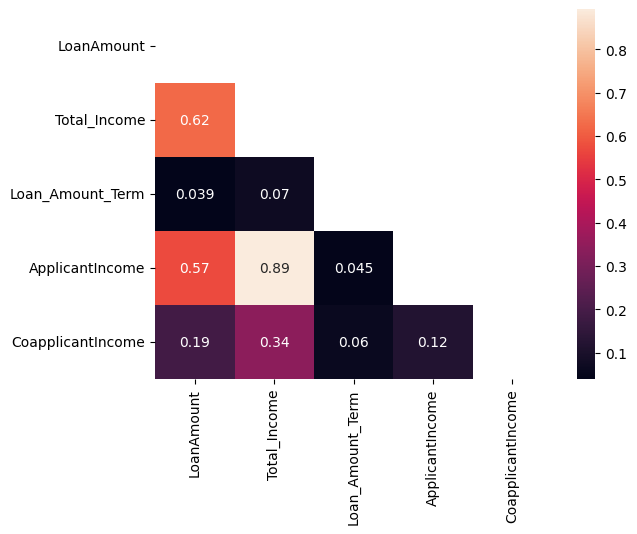

In [ ]:
# Correlation plot including total income
correlation_plot(df.filter(['LoanAmount', 'Total_Income', 'Loan_Amount_Term', 'ApplicantIncome', 'CoapplicantIncome']))

* Total income is mostly determined by applicant income.
* Coapplicant income does not correlate much with other numerical features
* Higher income associated with higher loan amount

# Model

In [ ]:
# Best model results
name='random_forest'
print(f'Best hyperparameters for {name}: {grid[name].best_params_}')
print(f'Best grid search score for {name}: {grid[name].best_score_}')
print(f'Test set r^2 score for {name}: {grid[name].score(X_test, y_test)}')
grid['random_forest']

Best hyperparameters for random_forest: {'classifier__max_depth': 5}
Best grid search score for random_forest: 0.7738816738816738
Test set r^2 score for random_forest: 0.7804878048780488


GridSearchCV(estimator=Pipeline(steps=[('transform',
                                        FunctionTransformer(func=<function transform_features at 0x0000019331FFAE50>)),
                                       ('preprocessing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('impute_mean',
                                                                                          SimpleImputer()),
                                                                                         ('scaling',
                                                                                          StandardScaler())]),
                                                                         ['LoanAmount',
                                                                          'Total_Income',
                                                                          'Loan_Amount_Term']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('...
                                                                                                                           ['Credit_History']),
                                                                                                                          ('fill_mode',
                                                                                                                           SimpleImputer(strategy='most_frequent'),
                                                                                                                           ['Self_Employed',
                                                                                                                            'Gender',
                                                                                                                            'Dependents',
                                                                                                                            'Married'])])),
                                                                                         ('one-hot-encode',
                                                                                          OneHotEncoder(sparse=False))]),
                                                                         ['Gender',
                                                                          'Dependents',
                                                                          'Education',
                                                                          'Property_Area',
                                                                          'Married',
                                                                          'Self_Employed',
                                                                          'Credit_History'])])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__max_depth': [3, 4, 5]})

<br><br><br><br><br><br><br><br>

![image](postman.png)

<br><br><br><br><br><br><br><br>

# Next Steps
* Hyperparameter tuning
* Correct errors
* Look at feature importance
* More feature engineering, e.g. include coapplicant income